# CAR PRICE PREDICTION

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
car_price=pd.read_csv('CarPrice_Assignment.csv')
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data understanding

In [3]:
#Analysing the shape of the datafre=ame
car_price.shape

(205, 26)

In [4]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# determining the percentage of missing values
round(100*car_price.isnull().sum()/len(car_price),2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

There are no missing values in any of the columns

In [6]:
# Checking for duplicate rows
car_price.duplicated(subset=None, keep='first').sum()

0

There are no duplicated rows in the dataset

## Data Preparation

In [7]:
#Obtaining the brand name from car name
car_price['Brand_Name']=car_price['CarName'].apply(lambda x: x.split(' ')[0])
#dropping the carname variable
car_price.drop('CarName',axis=1,inplace=True)

In [8]:
#Function to obtain unique values from each categorical variable
def func_uniq(*args):
    for col in args:
        print(col + ":" , end =' ')
        print(car_price[col].unique())
    

In [9]:
#Obtaining the list of categorical variables
category_list=car_price.select_dtypes('object').columns.tolist()

# passing the categorical varibles to the user defined function to identify the unique values in each of the variables
func_uniq(*category_list)

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Brand_Name: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


***It is observed from the above result that there is inconsistency in spellings of brand name of cars. These are respelt to avoid errors in analysis
Also, certain variables like door number and cylinder number that contain numeric information are stored as strings. These are converted into numbers***

In [10]:
# Correcting the spellings of the brand name of cars (ref : Google)
car_price.loc[car_price['Brand_Name']=='maxda',['Brand_Name']]= 'mazda'
car_price.loc[car_price['Brand_Name']=='Nissan',['Brand_Name']]='nissan'
car_price.loc[car_price['Brand_Name']=='porcshce',['Brand_Name']]='porsche'
car_price.loc[car_price['Brand_Name']=='toyouta',['Brand_Name']]='toyota'
car_price.loc[(car_price['Brand_Name']=='vokswagen') | (car_price['Brand_Name']=='vw'),['Brand_Name']]='volkswagen'


In [11]:
# Converting the variables doornumber and cylindernumber to numeric
car_price['doornumber']=car_price[['doornumber']].apply(lambda x: x.map({'two': 2, 'four':4}))
car_price['cylindernumber']=car_price[['cylindernumber']].apply(lambda x: x.map({'two': 2,'three':3, 'four':4, 'five': 5, 'six': 6,
                                'eight':8,'twelve':12}))

In [12]:
car_price.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand_Name
0,1,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Exploratory Data Analysis

###  Univariate Analysis

In [13]:
# Function to plot barplots for the given list of variabes
def func_bar(*args):                        
   
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the size of subplots                   
    
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=car_price,ax=ax_li[i], order = car_price[col].value_counts().index)  # countplot sorted by values
        ax_li[i].set_title(col)    # title
        ax_li[i].xaxis.set_tick_params(rotation=90)  # rotating x- axis
        plt.tight_layout()
        i=i+1


In [14]:
# Function to plot boxplot for the given list of variabes
def func_bxplt(*args,data_df):                        
   
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.boxplot(y=car_price[col],ax=ax_li[i])  # boxplot
        i=i+1
    

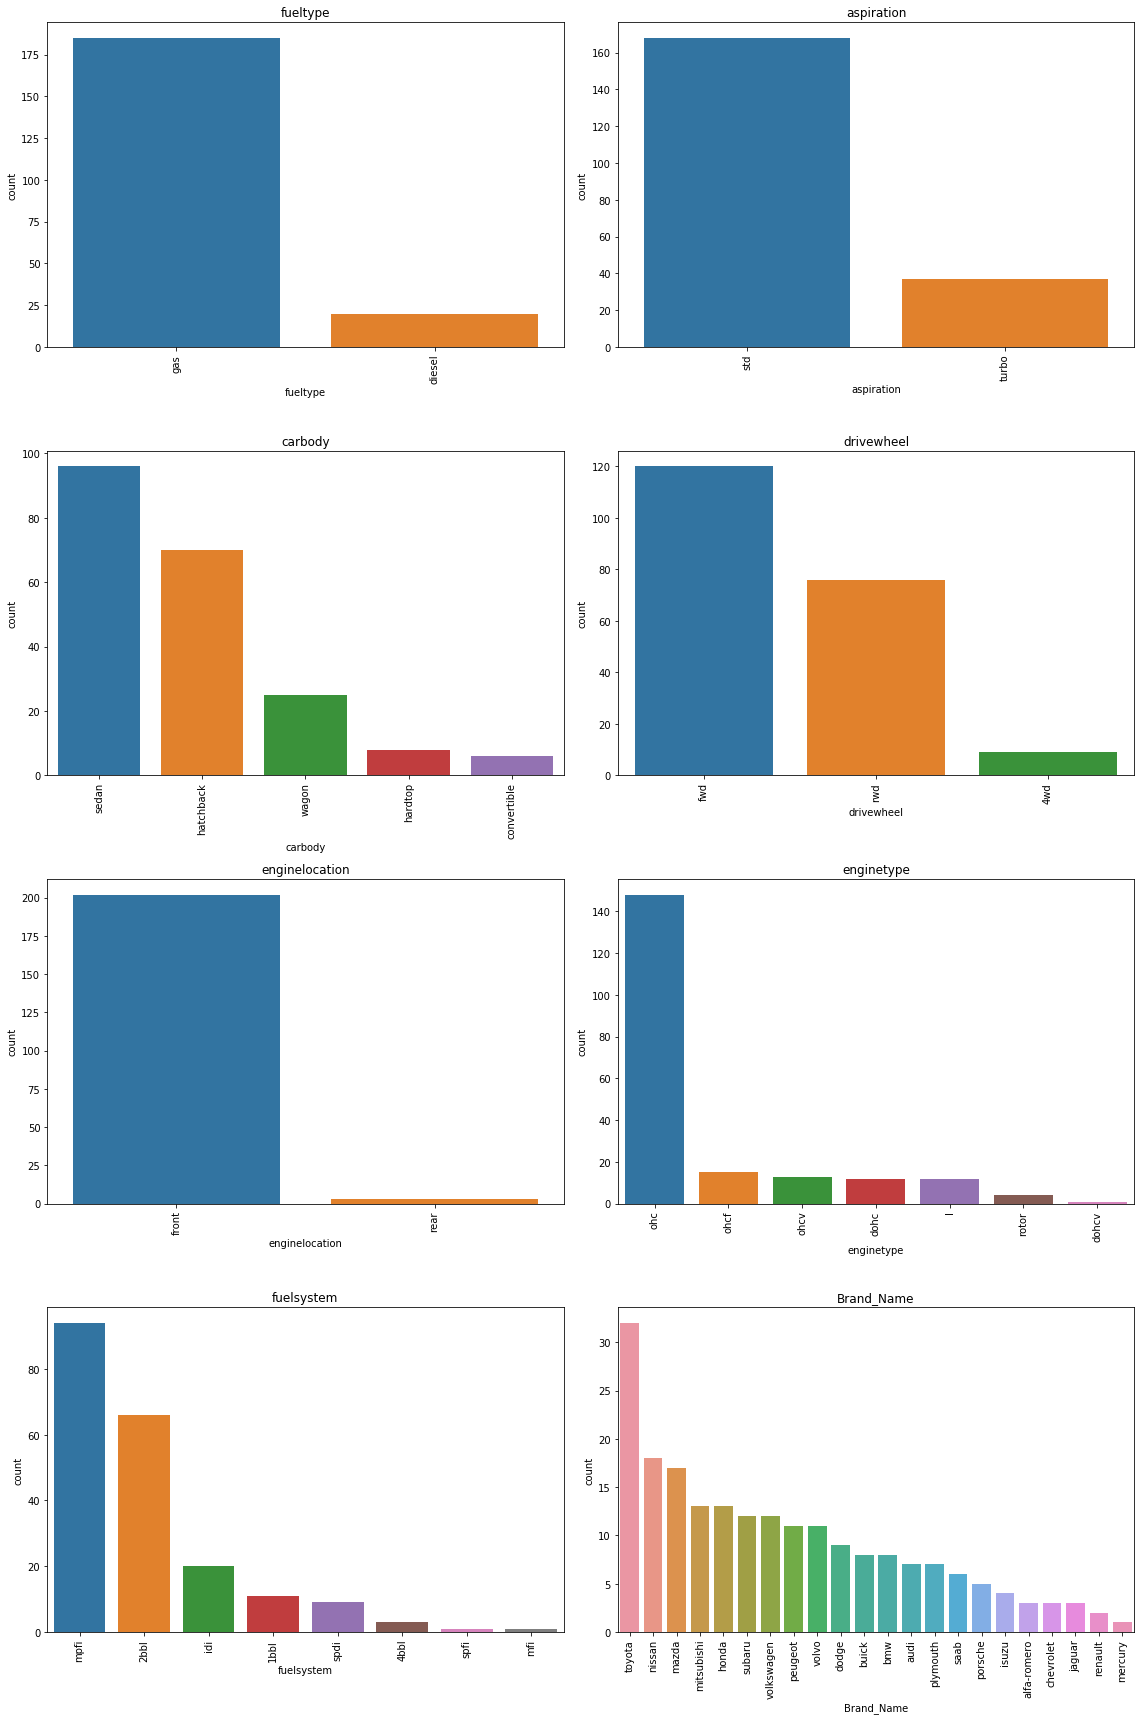

In [15]:
#Plotting barchart for Categorical variables
cat=car_price.select_dtypes('object').columns.tolist()  # Selecting all the categorica columns
func_bar(*cat)

***From the above graphs, the following conclusions can be drawn assuming that the information is obtained from random sampling:***

    1.Cars running on gas are widely preferred than that of diesel
    2.Cars with std aspiration are more than those with turbo aspiration
    3.Sedan is the most preferred body type followed by hatchback 
    4.fwd drivewheel is the most preferred and 4wd is the least preferred
    5.Most of the cars have engines located in the front
    6.ohc is the widely preferred engine type and dohcv is the least preferred type
    7.mpfi is the most preferred fuel system followed by 2bbl while mfi and spfi are the least preferred types
    8.Toyota is the widely used brand while Mercury is the least used
    

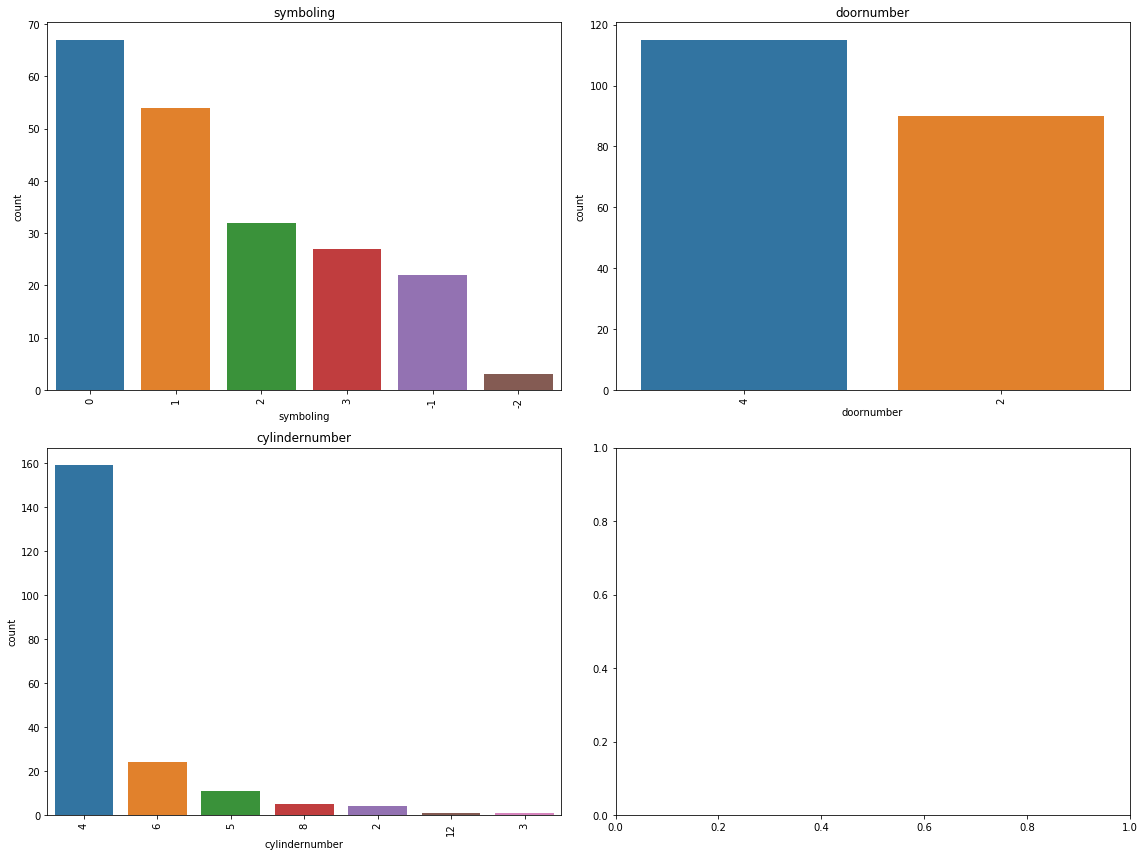

In [16]:
#Plotting Barchart for a few numeric variables( variables having a few unique values)
num=['symboling', 'doornumber', 'cylindernumber']
func_bar(*num)

In [17]:
num_list=[x for x in car_price.select_dtypes(include=np.number).columns if x not in num] # Selecing numeric variables that have many unique values

In [18]:
num_list1=car_price.select_dtypes(include=np.number).columns
num_list1

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

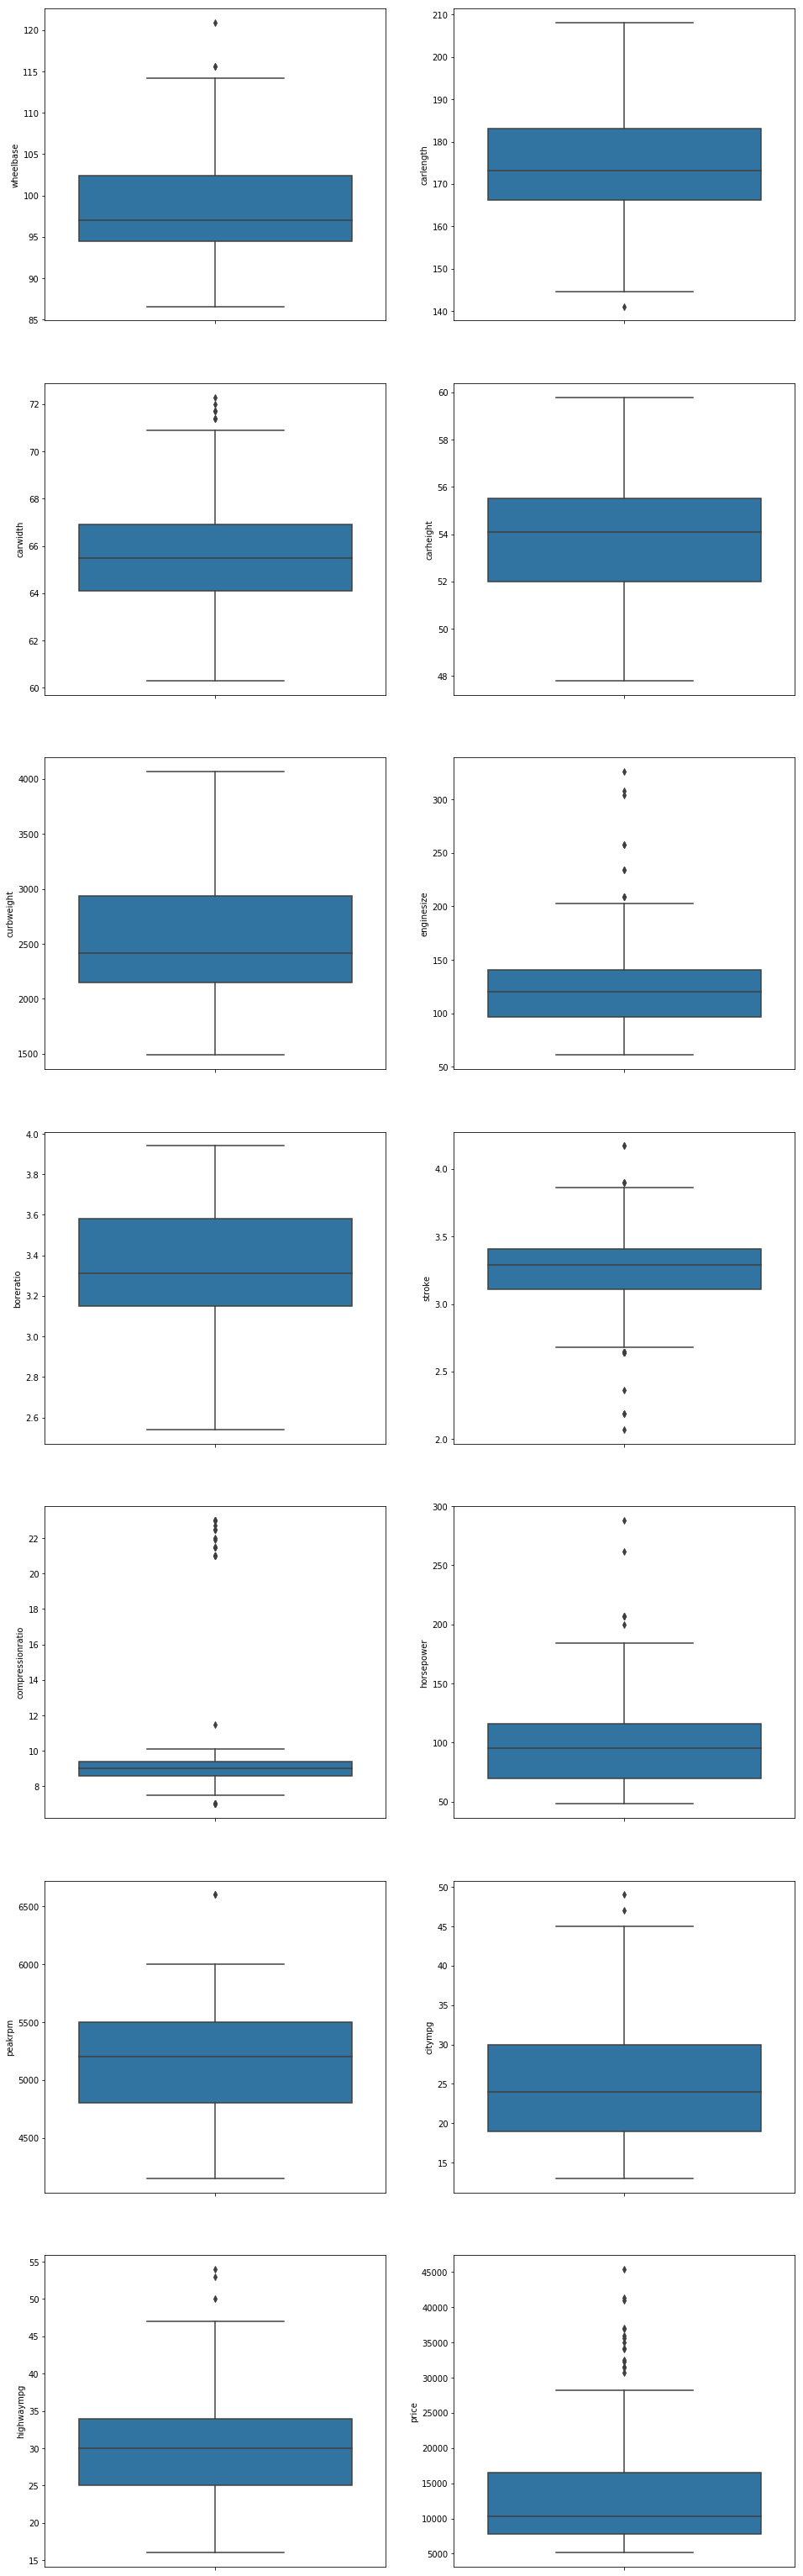

In [19]:
func_bxplt(*num_list[1:],data_df=car_price) # Calling the user definedbox plot function to plot 

From the above plots, it is clear that there a outliers present in a few independent variables.However, on close inspection, it is evident that these outliers correspond to luxurious or high-end car models and hence they need not be removed. Also, since the dataset is small, removing all the outliers will result in a significant loss of data. Hence they are handled during Feature Scaling before model building.

# Data Preparation

In [20]:
# Converting categorical variables to numeric variablesby direct binary mapping
car_price[['fueltype']]=car_price[['fueltype']].apply(lambda x: x.map({'gas': 1, 'diesel' : 0}))
car_price[['aspiration']]=car_price[['aspiration']].apply(lambda x: x.map({'std': 1, 'turbo' : 0}))
car_price[['enginelocation']]=car_price[['enginelocation']].apply(lambda x: x.map({'front': 1, 'rear' : 0}))

In [21]:
# Creating one hot encoded dummy variables
brand=pd.get_dummies(car_price['Brand_Name'])
body = pd.get_dummies(car_price['carbody'])
engine = pd.get_dummies(car_price['enginetype'])
fuel_sys = pd.get_dummies(car_price['fuelsystem'])
drive_wheel=pd.get_dummies(car_price['drivewheel'])

# Using the results of univariate analysis to drop the type that contribute the least to each category
brand = brand.drop(['mercury'], 1)
body = body.drop(['convertible'], 1)
fuel_sys = fuel_sys.drop(['mfi'], 1)
engine = engine.drop(['dohcv'], 1)
drive_wheel = drive_wheel.drop(['4wd'], 1)

In [22]:
# Dropping original categorical columns
car_price.drop(['Brand_Name','carbody','enginetype','fuelsystem','drivewheel'],axis=1,inplace=True)

In [23]:
# Adding the results to the original dataframe
car_price = pd.concat([car_price,brand,body,engine,fuel_sys,drive_wheel], axis = 1)

In [24]:
car_price.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,rotor,1bbl,2bbl,4bbl,idi,mpfi,spdi,spfi,fwd,rwd
0,1,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
1,2,3,1,1,2,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,1,0,0,0,1
2,3,1,1,1,2,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,4,2,1,1,4,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,1,0,0,1,0
4,5,2,1,1,4,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,1,0,0,0,0


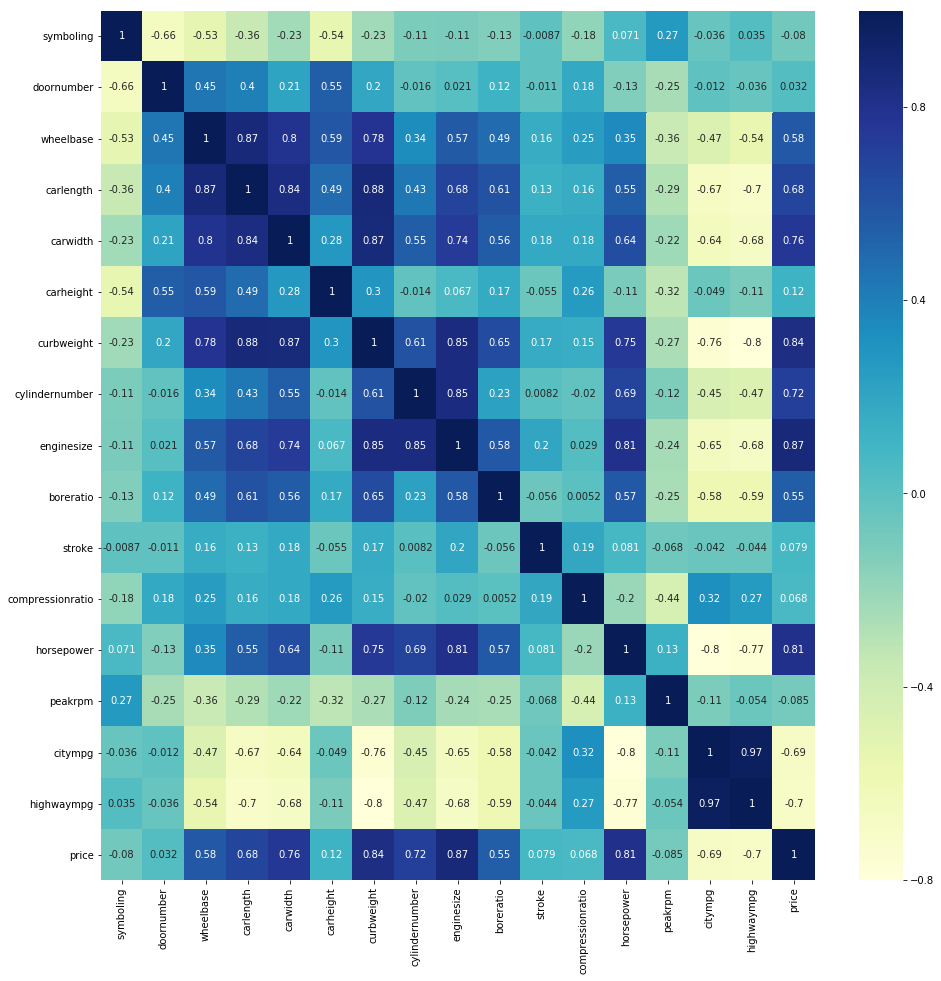

In [25]:
# Finding the correlation between numerical variables
f=plt.subplots(figsize=(16,16))
sns.heatmap(car_price[num_list1[1:]].corr(),annot=True,cmap="YlGnBu")

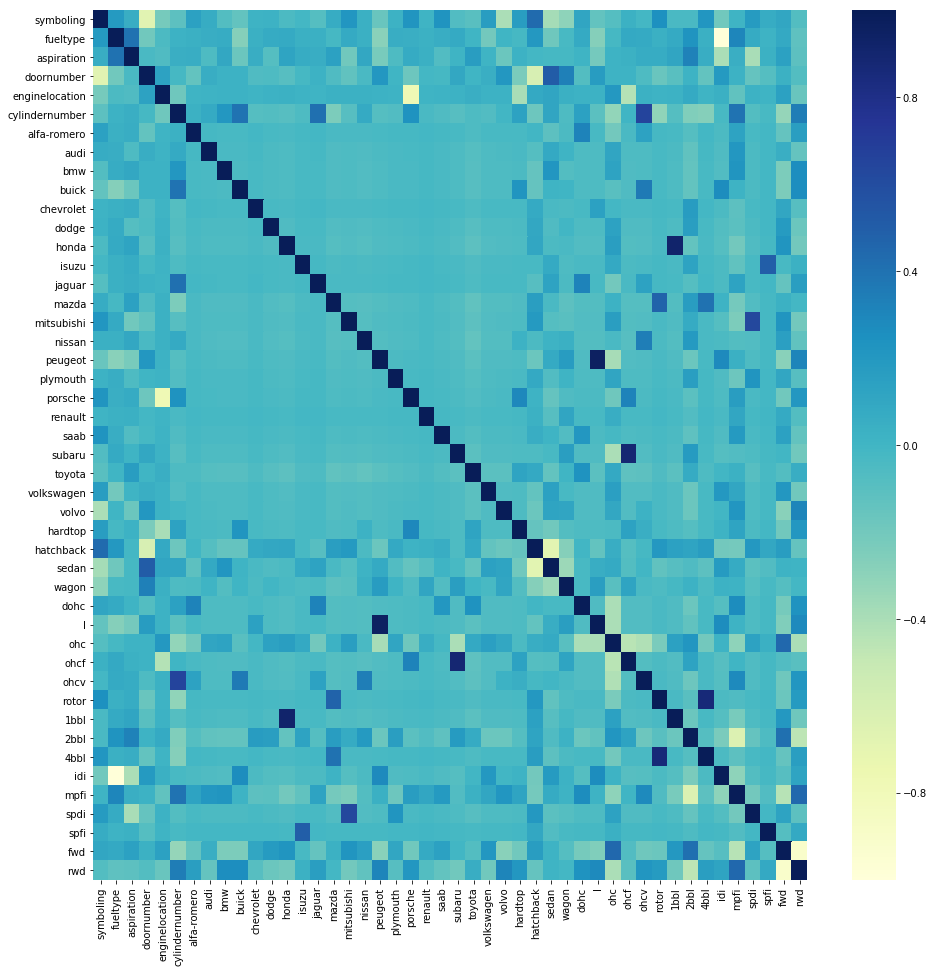

In [26]:
# Determining the correlation between categorical variables
f=plt.subplots(figsize=(16,16))
nn=[col for col in car_price.columns if col not in num_list]
sns.heatmap(car_price[nn].corr(),cmap="YlGnBu")


In [27]:
# Dropping one of the pair of highly correlated independent variables - variables having a correlation greater than 80%
car_price.drop(['wheelbase','carlength','carwidth','citympg','cylindernumber','idi','peugeot','1bbl','saab','dodge'],axis=1,inplace=True)

## Building a Linear Regression Model

### Train - Test Split

In [28]:
# Splitting the data into train(70%) and test(30%) set
np.random.seed(0)
df_train,df_test=train_test_split(car_price,train_size=0.7, test_size=0.3, random_state=100)

In [29]:
#scaling the variables
scaler=MinMaxScaler()

# Applying scaleer to numerical columns that are not derived from categorical variables
num_vars=['symboling', 'doornumber', 'carheight', 'curbweight','enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 
           'peakrpm', 'highwaympg', 'price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])


In [30]:
df_train.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,curbweight,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,mpfi,spdi,spfi,fwd,rwd
122,123,0.6,1,1,1.0,1,0.265487,0.272692,0.139623,0.230159,...,0,0,0,1,0,0,0,0,1,0
125,126,1.0,1,1,0.0,1,0.212389,0.500388,0.339623,1.000000,...,0,0,0,0,0,1,0,0,0,1
166,167,0.6,1,1,0.0,1,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,0.0,1,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,1,0,0,0,1
199,200,0.2,1,0,1.0,1,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,0,1,0,0,0,1


In [31]:
df_train.describe()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,carheight,curbweight,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,mpfi,spdi,spfi,fwd,rwd
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000
mean,98.524476,0.559441,0.909091,0.818182,0.559441,0.993007,0.509004,0.407878,0.241351,0.497946,...,0.083916,0.062937,0.027972,0.349650,0.020979,0.440559,0.041958,0.0,0.594406,0.349650
std,58.977655,0.239200,0.288490,0.387050,0.498199,0.083624,0.215378,0.211269,0.154619,0.207140,...,0.278236,0.243703,0.165472,0.478536,0.143818,0.498199,0.201198,0.0,0.492733,0.478536
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,48.500000,0.400000,1.000000,1.000000,0.000000,1.000000,0.353982,0.245539,0.135849,0.305556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,97.000000,0.600000,1.000000,1.000000,1.000000,1.000000,0.522124,0.355702,0.184906,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,147.500000,0.600000,1.000000,1.000000,1.000000,1.000000,0.668142,0.559542,0.301887,0.682540,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [32]:
# Dividing  X and y  for model building
y_train=df_train.pop('price')
X_train=df_train

In [33]:
#Analysing the shape of the X_train dataframe
X_train.shape

(143, 50)

In [34]:
#Runnig RFE for selecting 20 out of 50 variables
lr=LinearRegression()
lr.fit(X_train,y_train)

rfe=RFE(lr,20)
rfe=rfe.fit(X_train,y_train)

In [35]:
#Checking the ranking for features assigned by FRFE algorithm
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 30),
 ('symboling', False, 10),
 ('fueltype', True, 1),
 ('aspiration', False, 5),
 ('doornumber', False, 23),
 ('enginelocation', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', False, 3),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('highwaympg', True, 1),
 ('alfa-romero', False, 7),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 20),
 ('honda', False, 17),
 ('isuzu', False, 11),
 ('jaguar', True, 1),
 ('mazda', False, 9),
 ('mitsubishi', True, 1),
 ('nissan', False, 22),
 ('plymouth', False, 6),
 ('porsche', True, 1),
 ('renault', False, 25),
 ('subaru', False, 24),
 ('toyota', False, 19),
 ('volkswagen', False, 18),
 ('volvo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohc', False, 26),
 ('l', False, 16),
 ('ohc', False, 15),
 ('ohcf', False, 12),
 ('ohc

In [36]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'curbweight', 'enginesize',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg', 'audi',
       'bmw', 'buick', 'jaguar', 'mitsubishi', 'porsche', 'volvo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rotor'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'aspiration', 'doornumber', 'carheight',
       'boreratio', 'stroke', 'alfa-romero', 'chevrolet', 'honda', 'isuzu',
       'mazda', 'nissan', 'plymouth', 'renault', 'subaru', 'toyota',
       'volkswagen', 'dohc', 'l', 'ohc', 'ohcf', 'ohcv', '2bbl', '4bbl',
       'mpfi', 'spdi', 'spfi', 'fwd', 'rwd'],
      dtype='object')

In [38]:
#Creating X_train dataframe with RFE selected variables
X_train = X_train[col]

In [39]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)  # Adding a constant variable 
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model
print(lm.summary())  # printing the summary of the model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     104.5
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           6.88e-67
Time:                        23:33:10   Log-Likelihood:                 224.11
No. Observations:                 143   AIC:                            -406.2
Df Residuals:                     122   BIC:                            -344.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3096      0.156  

#### Eliminating varaibales with p-values greater than 0.05 as they are insignificant

In [40]:
# Eliminating variable compression ratio that has the highest p-value
X_train1=X_train.drop('compressionratio',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.71e-68
Time:                        23:33:10   Log-Likelihood:                 223.76
No. Observations:                 143   AIC:                            -407.5
Df Residuals:                     123   BIC:                            -348.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2159      0.099      2.

In [41]:
# Eliminating variable engine size that has the next highest p-value
X_train1=X_train1.drop('enginesize',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm2 = sm.OLS(y_train,X_train1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.45e-68
Time:                        23:33:10   Log-Likelihood:                 223.05
No. Observations:                 143   AIC:                            -408.1
Df Residuals:                     124   BIC:                            -351.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2369      0.097      2.

In [42]:
# Eliminating variable fueltype that has the next highest p-value
X_train1=X_train1.drop('fueltype',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm3 = sm.OLS(y_train,X_train1).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.45e-69
Time:                        23:33:10   Log-Likelihood:                 222.31
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     125   BIC:                            -355.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1929      0.089      2.

In [43]:
# Eliminating variable peakrpm that has the next highest p-value
X_train1=X_train1.drop('peakrpm',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm4 = sm.OLS(y_train,X_train1).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           5.16e-70
Time:                        23:33:10   Log-Likelihood:                 221.28
No. Observations:                 143   AIC:                            -408.6
Df Residuals:                     126   BIC:                            -358.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2259      0.086      2.

***From the above summary, it is evident that all variables have a p-value < 0.05 and hence they are not eliminated. However, it is necessary to check for multicollinearity and hence VIF is calculted for the final list of variables*** 

#### Eliminating variables with VIF greater than 5

In [44]:
#Checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index()

,index,Features,VIF
0,0,const,353.02
1,14,sedan,10.44
2,13,hatchback,9.74
3,2,curbweight,5.44
4,15,wagon,5.40
5,3,horsepower,5.03
6,4,highwaympg,4.26
7,12,hardtop,2.28
8,10,porsche,2.09
9,1,enginelocation,2.04


In [45]:
# Eliminating variable sedan as it has a high VIF
X_train1=X_train1.drop('sedan',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm5 = sm.OLS(y_train,X_train1).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.96e-69
Time:                        23:33:11   Log-Likelihood:                 216.15
No. Observations:                 143   AIC:                            -400.3
Df Residuals:                     127   BIC:                            -352.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1560      0.086      1.

In [46]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index()

,index,Features,VIF
0,0,const,328.19
1,2,curbweight,5.34
2,3,horsepower,5.03
3,4,highwaympg,4.11
4,10,porsche,2.09
5,1,enginelocation,2.04
6,12,hardtop,1.53
7,8,jaguar,1.50
8,7,buick,1.47
9,13,hatchback,1.47


In [47]:
# Eliminating variable hardtop as it has a high VIF
X_train1=X_train1.drop('hardtop',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm6 = sm.OLS(y_train,X_train1).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.76e-70
Time:                        23:33:11   Log-Likelihood:                 216.00
No. Observations:                 143   AIC:                            -402.0
Df Residuals:                     128   BIC:                            -357.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1349      0.075      1.

In [48]:
#Now, we observe that the variable hatchback has a high P-value and hence it has to be removed

X_train1=X_train1.drop('hatchback',axis=1)

# Rebuiding the model
X_train1 = sm.add_constant(X_train1)
lm7 = sm.OLS(y_train,X_train1).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.83e-71
Time:                        23:33:11   Log-Likelihood:                 214.79
No. Observations:                 143   AIC:                            -401.6
Df Residuals:                     129   BIC:                            -360.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1461      0.075      1.

In [49]:
#Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index()

,index,Features,VIF
0,0,const,252.10
1,2,curbweight,5.10
2,3,horsepower,4.78
3,4,highwaympg,4.10
4,10,porsche,2.08
5,1,enginelocation,1.51
6,8,jaguar,1.49
7,7,buick,1.47
8,12,wagon,1.21
9,13,rotor,1.20


***From the above statistical results, it is clear that all the variables are significant. Since VIF of curbweight is close to 5, it is not eliminated and the above model is finalized for prediction ***

**The model equation is:**

price=0.1461*const-0.2833 * enginelocation + 0.5063 * curbweight +0.3336 * horsepower +0.1065 * highwaympg +0.1084 * audi+0.2985 * bmw + 0.2882*buick+0.2314*jaguar -0.0475*mitsubishi + 0.1596 * porsche + 0.0927*volvo -0.0393 * wagon + 0.0714* rotor 

Thus the price of car depends on certain properties of cars like engine location, curbweight, horse power, highwaympg, rotor and wagon and also the brand names audi, bmw, buick, jaguar, mitsubjishi, porsche and volvo.


## Residual Analysis of the train data

Linear Regression is performed based on the assumption that the residuals are normally distributed around mean zero with a constant variance. It is verified in the below steps

In [50]:
y_train_price = lm7.predict(X_train1)

Text(0.5, 0, 'Errors')

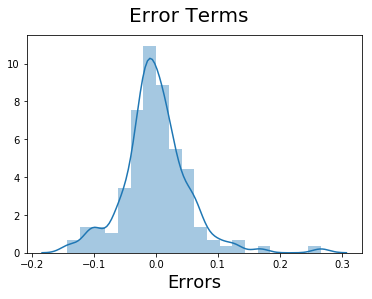

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

 From the above graph, it is concluded that the assumptions hold and we can use the model for prediction

## Prediction

In [52]:
# Scaling the numerical variables in the test set
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [53]:
# Creating X and y variables for the test set
y_test=df_test.pop('price')
X_test=df_test

In [54]:
# Selecting only those columns that were used for model building
X_test=X_test[X_train1.columns.tolist()[1:]]

In [55]:
# Making predictions using the final model
X_test1=sm.add_constant(X_test)  # Adding constant to the test variable
y_pred = lm7.predict(X_test1)  # prediction

## Model Evaluation

Text(0, 0.5, 'y_pred')

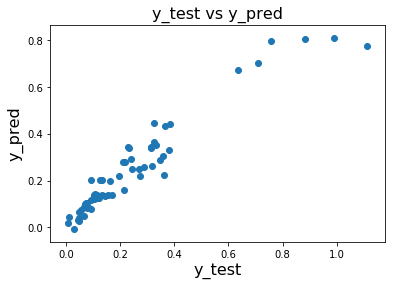

In [56]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)                                  # Scatterplot of actual vs predicted
plt.title('y_test vs y_pred', fontsize = 16)                # Plot title
plt.xlabel('y_test', fontsize = 16)                          # X-label
plt.ylabel('y_pred', fontsize = 16)                           # ylabel

In [57]:
# Obtaining the r2 value to maesure the goodness of fit
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115530222191021